# **Sprint 9 - Proyecto**
---

## **Descripci√≥n del Proyecto**

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer pr√°cticas en el departamento de anal√≠tica de **"Showz"**, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

- Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estad√≠sticas de gastos de marketing.

Lo que vas a investigar: 

- C√≥mo los clientes usan el servicio;
- cu√°ndo empiezan a comprar;
- cu√°nto dinero aporta cada cliente a la compa√±√≠a;
- cu√°ndo los ingresos cubren el costo de adquisici√≥n de los clientes.


## **Paso 1. Acceda los datos y prep√°ralos para el an√°lisis**
---

In [ ]:
# Importando librer√≠as:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Funci√≥n para cargar archivos corrigiendo los nombres de las columnas:
def cargar_archivo(direccion):
    df = pd.read_csv(direccion)
    columns = []

    for element in list(df.columns):
        element = element.lower().replace(' ', '_').strip()
        columns.append(element)

    df.columns = columns
    return df

In [3]:
# Cargando archivos:
costs = cargar_archivo('datasets/costs_us.csv')
orders_log = cargar_archivo('datasets/orders_log_us.csv')
visits_log = cargar_archivo('datasets/visits_log_us.csv')

### **Preparaci√≥n de datos:**

#### **Data Frame "costs":**

In [4]:
# Examinando contenido de "costs"
print(costs.info())
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [5]:
# Convirtiendo columna "dt" al tipo datetime
costs['dt'] = pd.to_datetime(costs['dt'])

#### **Data Frame "orders_log":**

In [6]:
# Examinando contenido de "orders_log"
print(orders_log.info())
display(orders_log.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [7]:
# Convirtiendo columna "Buy Ts" al tipo datetime
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])

#### **Data Frame "visists_log":**

In [8]:
# Examinando contenido de "visits_log"
print(visits_log.info())
display(visits_log.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [9]:
# Convirtiendo columnas "end_ts" y "start_ts" al tipo datetime
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])

## **Paso 2. Haz informes y calcula m√©tricas**
---

### **1. Visitas:**

#### 1. ¬øCu√°ntas personas lo usan cada d√≠a, semana y mes?

In [10]:
# Creando nuevas columans "visit_day", "visit_week", "visit_month"
visits_log['visit_day'] = visits_log['start_ts'].dt.date
visits_log['visit_week'] = (pd.to_datetime(visits_log['start_ts'], unit='d') - pd.to_timedelta(visits_log['start_ts'].dt.day_of_week, unit='d')).dt.date
visits_log['visit_month'] = visits_log['start_ts'].dt.to_period('M')

In [11]:
# Contando el n√∫mero de usuarios para cada dia
dau = visits_log.groupby('visit_day').agg({'uid':'nunique'})
# Contando el n√∫mero de usuarios para cada semana
wau = visits_log.groupby('visit_week').agg({'uid':'nunique'})
# Contando el n√∫mero de usuarios para cada mes
mau = visits_log.groupby('visit_month').agg({'uid':'nunique'})

In [12]:
print('¬øCu√°ntas personas lo usan cada d√≠a, semana y mes?')
# Mostrando dau:
print('DAU promedio:', round(dau.mean().iloc[0], 2))
# Mostrando wau:
print('WAU promedio:', round(wau.mean().iloc[0], 2))
# Mostrando mau:
print('MAU promedio:', round(mau.mean().iloc[0], 2))

¬øCu√°ntas personas lo usan cada d√≠a, semana y mes?
DAU promedio: 907.99
WAU promedio: 5716.25
MAU promedio: 23228.42


#### 2. ¬øCu√°ntas sesiones hay por d√≠a? (Un usuario puede tener m√°s de una sesi√≥n)

In [13]:
# Contando el n√∫mero de usuarios y n√∫mero de visitas al d√≠a
session_by_day = visits_log.groupby('visit_day').agg({'uid':['nunique', 'count']}).reset_index()
    # Renombrando columnas
session_by_day.columns = ['visit_day', 'n_users', 'n_visits']
# Calculando proporci√≥n.¬øCu√°ntas sesiones tiene un usuario al d√≠a?
session_by_day['proporci√≥n'] = session_by_day['n_visits'] / session_by_day['n_users']

print('¬øCu√°ntas sesiones hay por d√≠a?')
print(f'En promedio, al d√≠a se registran: {session_by_day["n_visits"].mean():.2f} sesiones.')

display(session_by_day.sample(5))

¬øCu√°ntas sesiones hay por d√≠a?
En promedio, al d√≠a se registran: 987.36 sesiones.


visit_day  n_users  n_visits  proporci√≥n
232  2018-01-19     1173      1277    1.088662
152  2017-10-31     1259      1366    1.084988
315  2018-04-13      946      1020    1.078224
347  2018-05-15      755       832    1.101987
92   2017-09-01      572       623    1.089161

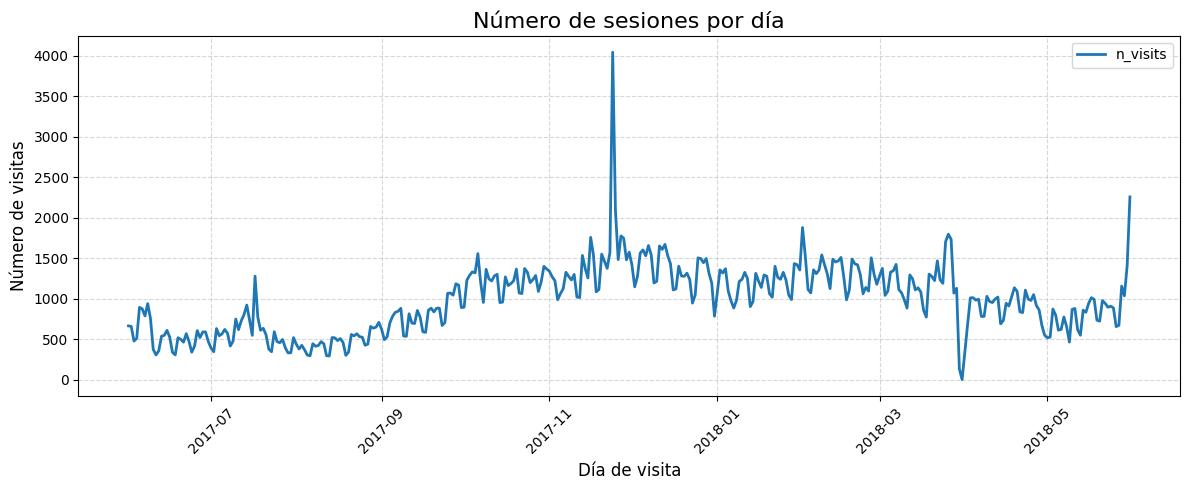

In [14]:
# Graficar
session_by_day.plot(x='visit_day', y='n_visits', linewidth=2, figsize=(12, 5))

# Personalizar la gr√°fica
plt.title('N√∫mero de sesiones por d√≠a', fontsize=16)
plt.xlabel('D√≠a de visita', fontsize=12)
plt.ylabel('N√∫mero de visitas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='x', rotation=45)

# Mostrar
plt.tight_layout()
plt.show()


#### 3. ¬øCu√°l es la duraci√≥n de cada sesi√≥n?

In [15]:
# Calculando la duraci√≥n de cada sesi√≥n
visits_log['duration'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds

print(f'La duraci√≥n promedio de cada sesi√≥n es de: {visits_log["duration"].mean():.2f} segundos.')
# Mostrando DataFrame con columna nueva
display(visits_log.head())

La duraci√≥n promedio de cada sesi√≥n es de: 643.51 segundos.


device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid   visit_day  visit_week visit_month  duration  
0  16879256277535980062  2017-12-20  2017-12-18     2017-12      1080  
1    104060357244891740  2018-02-19  2018-02-19     2018-02      1680  
2   7459035603376831527  2017-07-01  2017-06-26     2017-07         0  
3  16174680259334210214  2018-05-20  2018-05-14     2018-05      1440  
4   9969694820036681168  2017-12-27  2017-12-25     2017-12         0

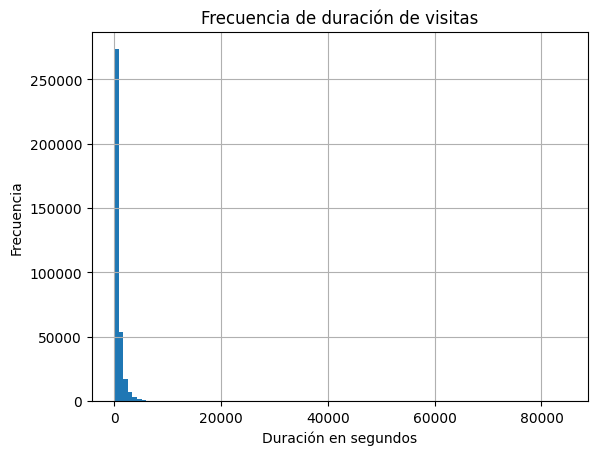

In [16]:
# Graficar
visits_log['duration'].hist(bins=100)

plt.title('Frecuencia de duraci√≥n de visitas')
plt.xlabel('Duraci√≥n en segundos')
plt.ylabel('Frecuencia')
plt.show()

#### 4. ¬øCon qu√© frecuencia los usuarios regresan?

In [17]:
# Encontrar la fecha de la primer visita de cada usuario
first_visit_by_user = visits_log.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visit_by_user.columns = ['uid', 'first_visit_ts']

In [18]:
# Extrayendo d√≠a y mes de la primera visita de cada usuario en columnas nuevas
first_visit_by_user['first_visit_day'] = first_visit_by_user['first_visit_ts'].dt.date
first_visit_by_user['first_visit_week'] = (pd.to_datetime(first_visit_by_user['first_visit_ts'], unit='d') - pd.to_timedelta(first_visit_by_user['first_visit_ts'].dt.day_of_week, unit='d')).dt.date
first_visit_by_user['first_visit_month'] = first_visit_by_user['first_visit_ts'].dt.to_period('M')

In [19]:
# Uniendo con el dataframe "visits_log"
visits_log = pd.merge(visits_log, first_visit_by_user, on='uid', how='left')

In [20]:
# Tasa de Retenci√≥n
    # Ciclos de vida en meses
visits_log['age_months'] = (visits_log['visit_month'].astype('int') - visits_log['first_visit_month'].astype('int'))

# Mostrando resultado de las columnas nuevas
display(visits_log.head(4))

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   

                    uid   visit_day  visit_week visit_month  duration  \
0  16879256277535980062  2017-12-20  2017-12-18     2017-12      1080   
1    104060357244891740  2018-02-19  2018-02-19     2018-02      1680   
2   7459035603376831527  2017-07-01  2017-06-26     2017-07         0   
3  16174680259334210214  2018-05-20  2018-05-14     2018-05      1440   

       first_visit_ts first_visit_day first_visit_week first_visit_month  \
0 2017-12-20 17:20:00      2017-12-20       2017-12-18           2017-12   
1 2018-02-19 16:53:00      2018-02-19       2018-02-19           2018-02   
2 2017-07-01 01:54:00      2017-07-01       2017-06-26           2017-07   
3 2018-03-09 20:05:00      2018-03-09       2018-03-05           2018-03   

   age_months  
0           0  
1           0  
2           0  
3           2

In [21]:
# Encontrando numero de usuarios √∫nicos que tuvieron almenos una visita, agrupados por cohorte y por mes de vida
cohorts_months = visits_log.groupby(['first_visit_month','age_months']).agg({'uid':'nunique'}).reset_index()

# Encontrando la cantidad de usuarios inicial en cada cohorte
initial_count = cohorts_months.query('age_months == 0')[['first_visit_month', 'uid']]
    # Renombrando columnas
initial_count.columns = ['first_visit_month', 'cohorts_users']

# Uniendo dfs, asignando la cantidad de usuarios inicial de cada cohorte a cada registro en relaci√≥n con la cohorte a la que pertenece
cohorts_months = pd.merge(cohorts_months, initial_count, on='first_visit_month')

In [22]:
# Calculando tasa de retenci√≥n
cohorts_months['retention'] = (cohorts_months['uid'] / cohorts_months['cohorts_users'])*100

In [23]:
# Creando pivot table
cohorts_pivot = cohorts_months.pivot_table(
    columns='age_months',
    index='first_visit_month',
    values='retention'
)
# Mostrando pivottable
display(cohorts_pivot.fillna(''))

age_months            0         1         2         3         4         5   \
first_visit_month                                                            
2017-06            100.0  7.866355  5.377479  6.139226  6.855721  7.142318   
2017-07            100.0  5.608828  5.129376  5.616438  5.821918  4.817352   
2017-08            100.0  7.690797  6.286219  6.276397  5.009331  4.400354   
2017-09            100.0  8.548851  6.920498  5.070642  3.939176  3.783525   
2017-10            100.0    7.8608  5.223852  3.895754  3.426108  3.222081   
2017-11            100.0  7.828097  4.411333  3.868174  3.372725  2.341456   
2017-12            100.0   5.58018  3.799272  3.110654  2.026278  1.903593   
2018-01            100.0  5.971535  3.933876  2.497348  2.024399             
2018-02            100.0  5.707979  2.545389  2.009281                       
2018-03            100.0  4.181845  2.705328                                 
2018-04            100.0  4.837991                                           
2018-05            100.0                                                     

age_months               6         7         8         9         10       11  
first_visit_month                                                             
2017-06            6.101516  5.777208  5.234181   5.08334  4.065163  4.49506  
2017-07            4.535769   4.57382  3.881279  2.861492  2.747336           
2017-08            3.634221  3.948532   2.78951  2.602888                     
2017-09            3.585967  2.418582  2.280891                               
2017-10            2.136505  2.036417                                         
2017-11            2.179977                                                   
2017-12                                                                       
2018-01                                                                       
2018-02                                                                       
2018-03                                                                       
2018-04                                                                       
2018-05

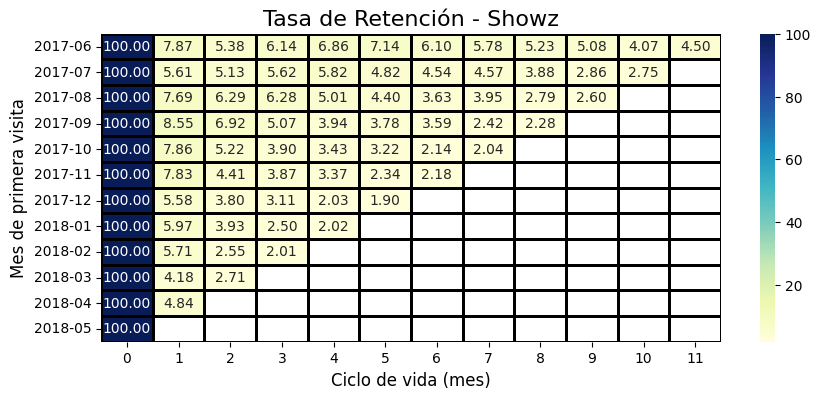

In [24]:
# Creando un mapa de calor para visualizar la tasa de retenci√≥n
plt.figure(figsize=(10, 4))
sns.heatmap(
    cohorts_pivot,
    annot=True,
    linewidths=1,
    linecolor='black',
    fmt='.2f',
    cmap='YlGnBu'
)
# Formateando gr√°fico con plt
plt.title('Tasa de Retenci√≥n - Showz', fontsize=16)
plt.xlabel('Ciclo de vida (mes)', fontsize=12)
plt.ylabel('Mes de primera visita', fontsize=12)

plt.show()

üí° **¬øCon qu√© frecuencia los usuarios regresan?**

A partir del mapa de calor se observa que **la tasa de retenci√≥n disminuye dr√°sticamente despu√©s del primer mes de vida en todas las cohortes**, cayendo del 100 % a menos del 8 %. A partir de ese punto, la retenci√≥n contin√∫a disminuyendo, pero a un ritmo mucho m√°s moderado durante los meses siguientes. Destaca la cohorte de junio de 2017, que conserva al 4.5 % de sus usuarios activos tras 11 meses.

Este comportamiento sugiere que *los usuarios no visitan el sitio con frecuencia* para adquirir boletos o consultar eventos. De hecho, solo alrededor del 5 % de los usuarios contin√∫a accediendo mensualmente, lo que indica un inter√©s espor√°dico por parte de la mayor√≠a del p√∫blico.

### **2. Ventas:**

#### 1. ¬øCu√°ndo empieza la gente a comprar?
(En el an√°lisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversi√≥n, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo d√≠a, el usuario podr√≠a caer en la categor√≠a Conversion 0d. Si la primera compra ocurre al d√≠a siguiente, ser√° Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qu√© cohorte o canal de marketing es m√°s efectivo.)

In [25]:
# Obteniendo la primera compra por usuario
first_buys = orders_log.groupby('uid').agg({'buy_ts':'min'})
    # Renombrando las columnas
first_buys.rename(columns={'buy_ts':'first_buy_ts'}, inplace=True)

In [26]:
# Extrayendo d√≠a y mes para cada primera compra
first_buys['first_buy_day'] = first_buys['first_buy_ts'].dt.date
first_buys['first_buy_month'] = first_buys['first_buy_ts'].dt.to_period('M')

In [27]:
# Uniendo data frame
orders_log = orders_log.merge(first_buys, on='uid', how='left')

In [28]:
# Extrayendo d√≠a y mes de cada compra
orders_log['buy_day'] = orders_log['buy_ts'].dt.date
orders_log['buy_month'] = orders_log['buy_ts'].dt.to_period('M')
orders_log.head(5)

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_buy_day first_buy_month     buy_day buy_month  
0    2017-06-01         2017-06  2017-06-01   2017-06  
1    2017-06-01         2017-06  2017-06-01   2017-06  
2    2017-06-01         2017-06  2017-06-01   2017-06  
3    2017-06-01         2017-06  2017-06-01   2017-06  
4    2017-06-01         2017-06  2017-06-01   2017-06

In [29]:
# Uniendo dataframes
buyers = orders_log.merge(first_visit_by_user, on='uid', how='left')
# Creando la columna "days_to_buy"
buyers['days_to_buy'] = (pd.to_datetime(buyers['first_buy_day']) - pd.to_datetime(buyers['first_visit_day'])).dt.days
# Filtrando solo la informaci√≥n √∫nica de cada cliente
buyers_unique = buyers[~buyers['uid'].duplicated()]
# Mostrando N√∫mero de compradores para cada categor√≠a
print('N√∫mero de compradores para cada categor√≠a:')
display(buyers_unique['days_to_buy'].value_counts().reset_index().head(15))

N√∫mero de compradores para cada categor√≠a:


days_to_buy  count
0             0  25039
1             1   1966
2             2    685
3             3    452
4             4    386
5             5    307
6             6    264
7             7    237
8             8    216
9             9    162
10           10    135
11           13    126
12           14    123
13           11    121
14           15    116

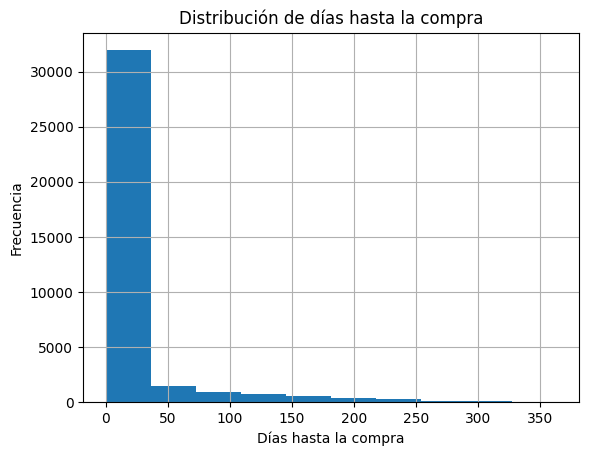

In [30]:
# Creando histograma
buyers_unique['days_to_buy'].hist(bins=10)

plt.title('Distribuci√≥n de d√≠as hasta la compra')
plt.xlabel('D√≠as hasta la compra')
plt.ylabel('Frecuencia')
plt.show()

üí° **¬øCu√°ndo empieza la gente a comprar?**

Se observa que la gran mayor√≠a de los **compradores** realizan su primera compra el mismo d√≠a que visitan por primera vez la p√°gina web. El histograma muestra el comportamiento de los **usuarios** y cuantos d√≠as les toma en *convertirse* en **compradores**. 

Es muy importante mencionar que el gr√°fico no considera a los usuarios que han visitado el sitio pero que jam√°s han realizado una compra. Dicha poblaci√≥n es muy grande y seguramente puede brindar informaci√≥n valiosa.

#### 2. ¬øCu√°ntos pedidos hacen durante un per√≠odo de tiempo dado?

In [31]:
# Calculando edad de cada cohorte (La cohorte es definida ahora por la fecha del primer pedido)
buyers['age'] = buyers['buy_month'].astype('int') - buyers['first_buy_month'].astype('int')

In [32]:
# Encontrando el n√∫mero de compras para cada ciclo de vida, tama√±o de cohorte y suma de las ganancias por mes en cada cohorte
buyers_cohorts_totals = buyers.groupby(['first_buy_month', 'age']).agg({'uid':['count','nunique'], 'revenue':'sum'}).reset_index()
    # Renombrando columnas
buyers_cohorts_totals.columns = ['first_buy_month', 'age', 'orders_count', 'buyers', 'cohort_revenue_month']

    # Encontrando tama√±o de cohorte
initial_buyers_count = buyers_cohorts_totals.query('age == 0')[['first_buy_month', 'buyers']]
    # Renombrando columnas
initial_buyers_count = initial_buyers_count.rename(columns={'buyers':'cohort_clients'}) 

# Uniendo Df's
buyers_cohorts_totals = buyers_cohorts_totals.merge(initial_buyers_count, on='first_buy_month', how='left')

In [33]:
# Calculando el promedio de ventas por usuario en una cohorte mes con mes
buyers_cohorts_totals['avg_orders'] = buyers_cohorts_totals['orders_count'] / buyers_cohorts_totals['cohort_clients']

display(buyers_cohorts_totals.head(5)) 

first_buy_month  age  orders_count  buyers  cohort_revenue_month  \
0         2017-06    0          2354    2023               9557.49   
1         2017-06    1           177      61                981.82   
2         2017-06    2           174      50                885.34   
3         2017-06    3           226      54               1931.30   
4         2017-06    4           292      88               2068.58   

   cohort_clients  avg_orders  
0            2023    1.163618  
1            2023    0.087494  
2            2023    0.086011  
3            2023    0.111715  
4            2023    0.144340

In [34]:
# Creando pivot table
buyers_orders_pivot = buyers_cohorts_totals.pivot_table(
    columns='age',
    index='first_buy_month',
    values='avg_orders'
)

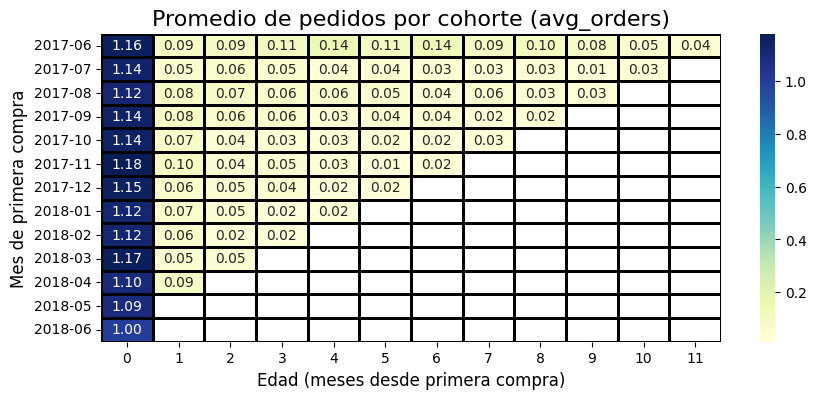

In [35]:
# Creando mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(
    buyers_orders_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gr√°fico con plt
plt.title("Promedio de pedidos por cohorte (avg_orders)", fontsize=16)
plt.xlabel("Edad (meses desde primera compra)", fontsize=12)
plt.ylabel("Mes de primera compra", fontsize=12)
plt.show()

üí° **¬øCu√°ntos pedidos hacen durante un per√≠odo de tiempo dado?**

El mapa de calor muestra el promedio de pedidos por usuario en cada cohorte y mes desde su primera compra. Se destaca lo siguiente:

- En todos los casos, el mes 0 (es decir, el mes en que los usuarios realizan su primera compra) muestra un promedio de pedidos por usuario superior a 1. Esto sugiere que, en promedio, cada usuario realiza m√°s de una compra en su primer mes como cliente.

- A partir del segundo mes (age = 1), el promedio de pedidos por usuario cae abruptamente, situ√°ndose generalmente en valores cercanos a 0.05‚Äì0.10. Esto indica que, en los meses posteriores, cada usuario realiza menos de una compra por mes.

- Este patr√≥n de fuerte ca√≠da en la actividad se repite de forma consistente entre las diferentes cohortes. No se observa una cohorte claramente destacada en t√©rminos de retenci√≥n o recurrencia de compra.

üß† **Conclusi√≥n**:

La actividad de los clientes se reduce dr√°sticamente a partir del primer mes de ciclo de vida. Existe una clara oportunidad de trabajar en estrategias que busquen aumentar la actividad de los clientes y extender el ciclo de vida activo mas all√° de √∫nicamente el primer mes.

#### 3. ¬øCu√°l es el tama√±o promedio de compra?

In [36]:
# Calculando las ganancias por compra para cada mes en cada cohorte
buyers_cohorts_totals['avg_revenue'] = buyers_cohorts_totals['cohort_revenue_month'] / buyers_cohorts_totals['orders_count']
buyers_cohorts_totals.head()

first_buy_month  age  orders_count  buyers  cohort_revenue_month  \
0         2017-06    0          2354    2023               9557.49   
1         2017-06    1           177      61                981.82   
2         2017-06    2           174      50                885.34   
3         2017-06    3           226      54               1931.30   
4         2017-06    4           292      88               2068.58   

   cohort_clients  avg_orders  avg_revenue  
0            2023    1.163618     4.060106  
1            2023    0.087494     5.547006  
2            2023    0.086011     5.088161  
3            2023    0.111715     8.545575  
4            2023    0.144340     7.084178

In [37]:
# Creando pivot table
buyers_revenue_pivot = buyers_cohorts_totals.pivot_table(
    index='first_buy_month',
    columns='age',
    values='avg_revenue'
)

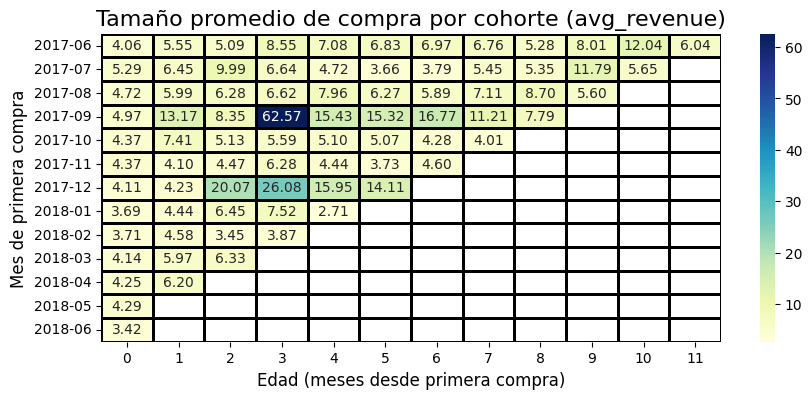

In [38]:
# Mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(
    buyers_revenue_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gr√°fico con plt
plt.title("Tama√±o promedio de compra por cohorte (avg_revenue)", fontsize=16)
plt.xlabel("Edad (meses desde primera compra)", fontsize=12)
plt.ylabel("Mes de primera compra", fontsize=12)
plt.show()

üí° **¬øCu√°l es el tama√±o promedio de compra?**

A partir del mapa de calor se observa que la gran mayor√≠a de los meses se cuenta con un tama√±o promedio de compra de alrededor de 4 - 10, lo que sugiere un gasto moderado y relativamente estable. 

Se destacan la cohorte 2017-09 y la cohorte 2017-12:

- **Cohorte 2017-09:**

Esta cohorte presenta un valor muy alto de 62.57 en el mes 3, y manteniendo valores relativamente altos en meses posteriores. Esto podr√≠a deberse a un peque√±o n√∫mero de usuarios que realizaron compras inusualmente grandes, lo que sugiere un posible nicho de clientes de alto valor. Tambi√©n podr√≠as tratarse de anomal√≠as en los datos que ameritan revisi√≥n.

- **Cohorte 2017-12:**

A partir del mes 2, esta cohorte tambi√©n muestra un comportamiento llamativo, con tama√±os promedio de compra superiores a 20 en los meses 2 y 3. Posteriormente el valor cae a 15 pero esto sigue siento mayor al promedio, lo que podr√≠a sugerir una promoci√≥n o campa√±a espec√≠fica en ese periodo que incentiv√≥ compras de mayor volumen.

üß† **Conclusi√≥n**:

Las cohortes 2017-09 y 2017-12 muestran comportamientos at√≠picos con pedidos significativamente m√°s grandes, lo que puede indicar la existencia de **clientes de alto valor**, **eventos especiales**, **o problemas de calidad de datos**. Es de suma importancia *descartar errores en la captura de los datos* y posteriormente identificar cuales son los registros que provocan este comportamiento particular, encontrando a los **clientes de alto valo**r (si los hubiera).

#### 4. ¬øCu√°nto dinero traen? (LTV)

In [39]:
# Calculando ltv
buyers_cohorts_totals['ltv'] = buyers_cohorts_totals['cohort_revenue_month'] / buyers_cohorts_totals['cohort_clients']
buyers_cohorts_totals.head()

first_buy_month  age  orders_count  buyers  cohort_revenue_month  \
0         2017-06    0          2354    2023               9557.49   
1         2017-06    1           177      61                981.82   
2         2017-06    2           174      50                885.34   
3         2017-06    3           226      54               1931.30   
4         2017-06    4           292      88               2068.58   

   cohort_clients  avg_orders  avg_revenue       ltv  
0            2023    1.163618     4.060106  4.724414  
1            2023    0.087494     5.547006  0.485329  
2            2023    0.086011     5.088161  0.437637  
3            2023    0.111715     8.545575  0.954671  
4            2023    0.144340     7.084178  1.022531

In [40]:
# Creando pivot table
buyers_ltv_pivot = buyers_cohorts_totals.pivot_table(
    index='first_buy_month',
    columns='age',
    values='ltv'
)

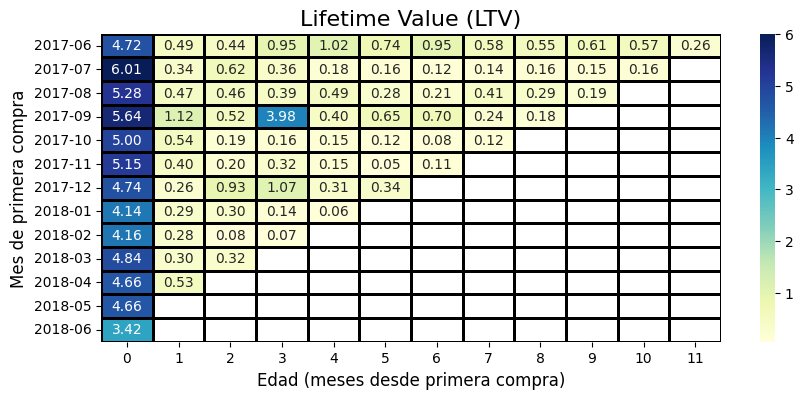

In [41]:
# Mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(
    buyers_ltv_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gr√°fico con plt
plt.title("Lifetime Value (LTV)", fontsize=16)
plt.xlabel("Edad (meses desde primera compra)", fontsize=12)
plt.ylabel("Mes de primera compra", fontsize=12)
plt.show()

In [42]:
acc_ltv = buyers_cohorts_totals.groupby('first_buy_month').agg({'ltv':'sum'}).reset_index()
display(acc_ltv)

first_buy_month        ltv
0          2017-06  11.879234
1          2017-07   8.386854
2          2017-08   8.471723
3          2017-09  13.435227
4          2017-10   6.360242
5          2017-11   6.395244
6          2017-12   7.639913
7          2018-01   4.940151
8          2018-02   4.587921
9          2018-03   5.455253
10         2018-04   5.189196
11         2018-05   4.660562
12         2018-06   3.420000

üí° **¬øCu√°nto dinero traen? (LTV)**

- Se observa que el comportamiento de el LTV para cada cohorte nuevamente presenta un pico inicial seguido de una caida r√°pida. En todas las cohortes, el valor m√°s alto de LTV ocurre en el mes 0, es decir, en el mes de la primera compra. Posteriormente, los valores caen bruscamente, lo que indica que la mayor√≠a del valor del cliente se captura en su primer mes.

- Despu√©s del primer mes, los LTV mensuales rara vez superan los 0.5 - 1. Esto refuerza lo visto anteriormente: los clientes tienen poca actividad mes con mes, lo que sugiere que las ganancias de Showz dependen de la adquisici√≥n continua de nuevos clientes.

- Se observa que las cohortes 2017-09 y 2017-12 son nuevamente las mas interesantes.

üß† **Conclusi√≥n**:

A partir de la visualizaci√≥n y an√°lisis de el LTV par cada cohorte, se observa nuevamente que los clientes no tienen actividad recurrente, si no que el m√°ximo beneficio se obtiene en el mes 0 de actividad. 

Se recomienda reforzar las estrategias de retenci√≥n de usuarios y realizar una segmentaci√≥n de las cohortes mas valiosas, analizando lo que las vuelve diferentes, como lo puede ser la fuente de anuncios que los atrajo (marketing).

### **3. Marketing:**

#### 1. ¬øCu√°nto dinero se gast√≥?  (Total/por fuente de adquisici√≥n/a lo largo del tiempo) 

In [43]:
# Gasto total de campa√±as de markerting
print('Las campa√±as de marketing sumaron un gasto total de:')
print(costs['costs'].sum())

Las campa√±as de marketing sumaron un gasto total de:
329131.62


In [44]:
# Gasto total para cada fuente de adquisici√≥n:
print('Cada fuente de adquisici√≥n gast√≥ un total de:')
display(costs.groupby('source_id')['costs'].sum().reset_index().sort_values(by='costs', ascending=False))

Cada fuente de adquisici√≥n gast√≥ un total de:


source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49

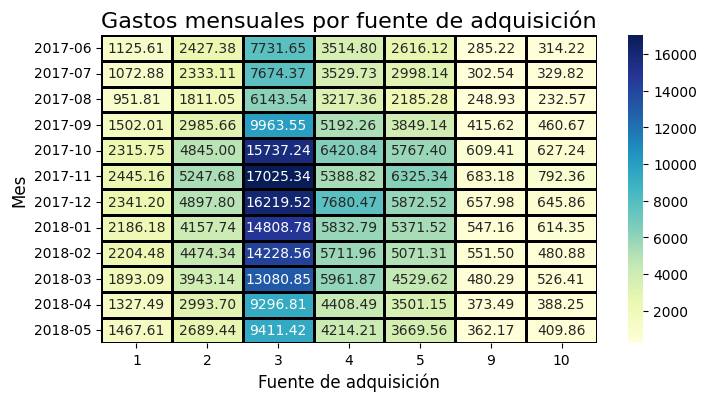

In [45]:
# Gasto para cada fuente de adquisici√≥n mes a mes:
    # Extrayendo mes con formato period
costs['month'] = costs['dt'].dt.to_period('M')
    # Sumando gastos para cada fuente de adquisici√≥n en cada mes:
monthly_costs = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()

# Creando pivot table:
monthly_costs_pivot = monthly_costs.pivot_table(
    columns='source_id',
    index='month',
    values='costs'
)

# Gr√°fico de calor:
plt.figure(figsize=(8,4))
sns.heatmap(
    monthly_costs_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gr√°fico con plt
plt.title("Gastos mensuales por fuente de adquisici√≥n", fontsize=16)
plt.xlabel("Fuente de adquisici√≥n", fontsize=12)
plt.ylabel("Mes", fontsize=12)
plt.show()


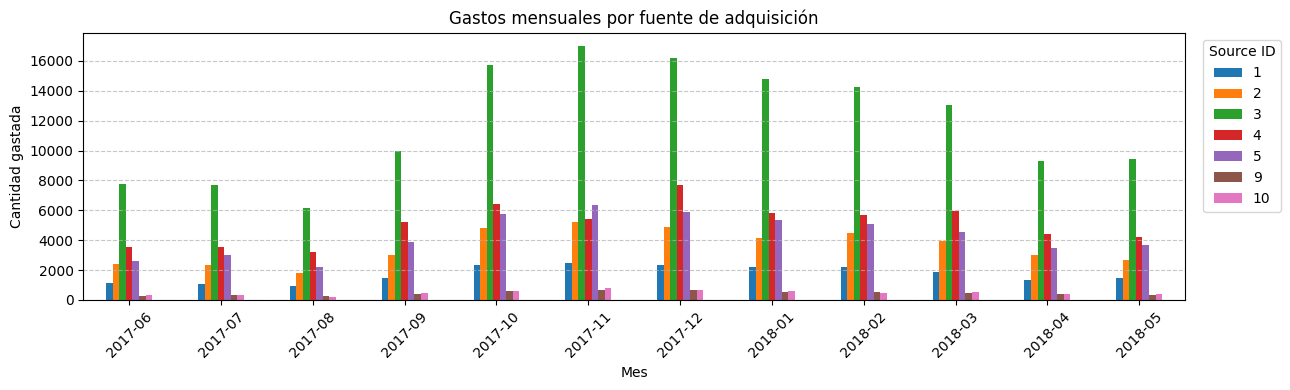

In [46]:
# Generando gr√°fico de barras:
monthly_costs_pivot.plot(
    kind='bar',
    title='Gastos mensuales por fuente de adquisici√≥n',
    xlabel='Mes',
    ylabel='Cantidad gastada',
    rot=45,
    figsize=(13,4)
)

plt.legend(title='Source ID', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

üí° **¬øCu√°nto dinero se gast√≥?**

- Las campa√±as de marketing sumaron un **gasto total** de: 329131.62

- Se observa que las fuentes de adquisici√≥n que mas gastaron fueron la 3, 4 y 5 (con 141,321.63, 61,073.60 y 51,757.10 respectivamente) 

- **A lo largo del tiempo,** se observa que entre los meses de Octubre 2017 hasta Marzo 2018 existe una alza en los gastos para las fuentes 2, 3, 4 y 5. 



#### 2. ¬øCu√°l fue el costo de adquisici√≥n de clientes de cada una de las fuentes?

In [47]:
# Visitas
visits = visits_log[['start_ts', 'end_ts', 'visit_day', 'visit_month','uid','source_id','device']].query('source_id not in (6,7)') # Los canales 6 y 7 no aparecen en "costs"
print(f'Se cuenta con {len(visits)} visitas registradas en total.')

# Encontrando las primeras compras de cada cliente
first_orders = buyers.sort_values(by='buy_ts').drop_duplicates('uid')[['first_buy_ts', 'first_buy_month', 'uid']]
print(f'En total, existen {len(first_orders)} clientes que han realizado al menos una compra en ShowZ.')

Se cuenta con 359358 visitas registradas en total.
En total, existen 36523 clientes que han realizado al menos una compra en ShowZ.


In [48]:
# Relacionando primeras compras de cada cliente con todas las visitas de dicho cliente.
merged = pd.merge(
    first_orders,
    visits,
    on='uid',
    how='left'
)


# Encontrando la visita en la cual se realiz√≥ la compra
mask = (merged['first_buy_ts'] <= merged['end_ts']) & (merged['first_buy_ts'] >= merged['start_ts'])
acquisitions = merged[mask].copy()
acquisitions['source_id'] = acquisitions['source_id'].astype('int')

print(f'''Los {len(first_orders)} compradores √∫nicos han realizado en total {len(merged)} visitas al sitio, 
pero √∫nicamente se contabilizar√°n aquellas en las que se realiz√≥ la primera compra.
El total de primeras compras que tienen un registro coincidente en la tabla visits es {len(acquisitions)}.''')

Los 36523 compradores √∫nicos han realizado en total 97394 visitas al sitio, 
pero √∫nicamente se contabilizar√°n aquellas en las que se realiz√≥ la primera compra.
El total de primeras compras que tienen un registro coincidente en la tabla visits es 28893.


In [49]:
# Contando el n√∫mero de usuarios mensual por fuente de atracci√≥n
customers_acquired_by_cohort = acquisitions.groupby(['source_id', 'first_buy_month']).agg({'uid':'count'}).reset_index()
customers_acquired_by_cohort = customers_acquired_by_cohort.rename(columns={'first_buy_month':'month', 'uid':'clients_count'})

# Uniendo el n√∫mero de clientes adquiridos mes con mes y la inversi√≥n hecha en ese mes.
cac_df = customers_acquired_by_cohort.merge(monthly_costs, on=['month', 'source_id'], how='left')

# Calculando CAC
cac_df['cac'] = cac_df['costs'] / cac_df['clients_count']

cac_df.head()

source_id    month  clients_count    costs       cac
0          1  2017-06            226  1125.61  4.980575
1          1  2017-07            219  1072.88  4.898995
2          1  2017-08            131   951.81  7.265725
3          1  2017-09            271  1502.01  5.542472
4          1  2017-10            409  2315.75  5.661980

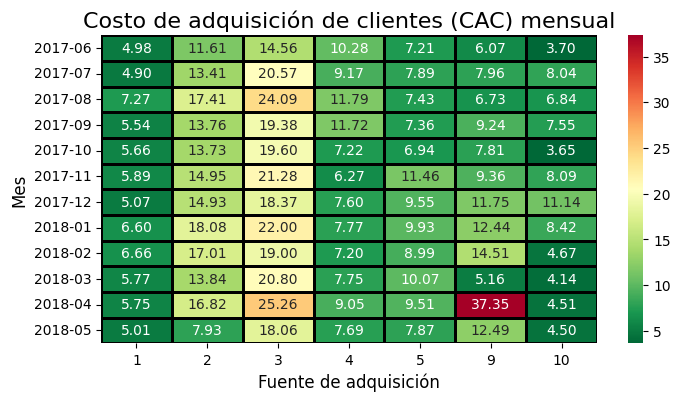

In [50]:
# Creando pivot table:
cac_pivot = cac_df.pivot_table(
    columns='source_id',
    index='month',
    values='cac'
)

# Gr√°fico de calor:
plt.figure(figsize=(8,4))
sns.heatmap(
    cac_pivot,
    cmap='RdYlGn_r',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gr√°fico con plt
plt.title("Costo de adquisici√≥n de clientes (CAC) mensual", fontsize=16)
plt.xlabel("Fuente de adquisici√≥n", fontsize=12)
plt.ylabel("Mes", fontsize=12)
plt.show()

üí° **¬øCu√°l fue el costo de adquisici√≥n de clientes de cada una de las fuentes?**

El mapa de calor presenta el costo por usuario atraido para cada fuente o canal de adquisici√≥n de clientes. 

- Los canales de adquisici√≥n **mas eficientes** son el 1 y el 10, ya que mantienen los valores de CAC bajos.

- Las fuentes 2 y 3 son visiblemente **menos efectivas** ya que tienen un CAC mes con mes mucho mas alto que el resto. 

- El valor mas alto es 37.35 y se encuentra en el mes de Abril para la fuente 9. Llama mucho la atenci√≥n ya que es un valor muy alto en comparaci√≥n con todos los dem√°s. Lo que podr√≠a indicar que existi√≥ una campa√±a fallida.

üß† **Conclusi√≥n**:

Ocurre algo interesante, nuestro dateframe (que relaciona a cada usuario con la fuente de atracci√≥n que lo atrajo el d√≠a de su compra) tiene una longitud de 28,893 mientras que, como vimos anteriormente, tenemos un total de 36,523 clientes (con al menos una compra). **Alrededor de 8,000 sesiones de clientes no han sido registrados en la tabla de visitas**, esto posiblemente se deba a la ausencia de informaci√≥n sobre otros m√©todos de atracci√≥n o un fallo en el registro de visitas.

A partir del an√°lisis de CAC se recomienda: 

- Invertir m√°s en los canales 1 y 10, que presentan buenos resultados con bajo CAC.

- Revisar las campa√±as de los canales 2, 3 y 9. Estos **no parecen rentables** en este punto del an√°lisis, se debe buscar optimizar con diferente estrategias.

El siguiente paso del an√°lisis debe ser calcular y analizar el ROMI. 



#### 3. ¬øCu√°n rentables eran las inversiones? (ROMI)

In [51]:
# Relacionando la tabla buyers con algunas columnas relevante de la tabla visits
buyers_visits_dirty = buyers[['uid','buy_ts','first_buy_month','age', 'revenue']].merge(visits[['uid', 'source_id', 'start_ts', 'end_ts']], on='uid', how='left')
# Filtrando registros donde 'buy_ts' est√© dentro del rango 'start_ts' - 'end_ts'
    # De esta forma encontramos a qu√© visita espec√≠fica corresponde cada compra. 
    # Y eso solo tiene sentido si la compra ocurri√≥ durante el tiempo que el usuario estaba en el sitio.
buyers_visits_clean = buyers_visits_dirty[(buyers_visits_dirty['buy_ts'] >= buyers_visits_dirty['start_ts']) & (buyers_visits_dirty['buy_ts'] <= buyers_visits_dirty['end_ts'])].copy()
buyers_visits_clean['source_id'] = buyers_visits_clean['source_id'].astype('int')
buyers_visits = buyers_visits_clean


# Extrayendo tama√±os de las cohortes (usuarios √∫nicos) por cohorte y canal
cohort_sizes = (
    buyers_visits.groupby(['first_buy_month', 'source_id'])['uid']
    .nunique()
    .reset_index()
    .rename(columns={'uid': 'cohort_size'})
)

# Revenue acumulado por cohorte, canal y edad
ltv = (
    buyers_visits.groupby(['first_buy_month', 'source_id', 'age'])['revenue']
    .sum()
    .reset_index()
    .sort_values(by=['first_buy_month', 'source_id', 'age'])
)

# Uniendo con tama√±o de la cohorte
ltv = ltv.merge(cohort_sizes, on=['first_buy_month', 'source_id'], how='left')

# Calculando LTV
ltv['ltv'] = ltv['revenue'] / ltv['cohort_size']

# Creando nuevo dataframe, que junta ltv con cac
romi_lifetime = ltv.merge(cac_df, left_on=['first_buy_month', 'source_id'], right_on=['month', 'source_id'], how='left')
# Calculando ROMI
romi_lifetime['romi'] = (romi_lifetime['ltv'] / romi_lifetime['cac'])*100

# Ajustar tipo de dato a columna "month"
romi_lifetime['month'] = romi_lifetime['month'].dt.to_timestamp()

In [52]:
romi_lifetime = romi_lifetime.dropna()

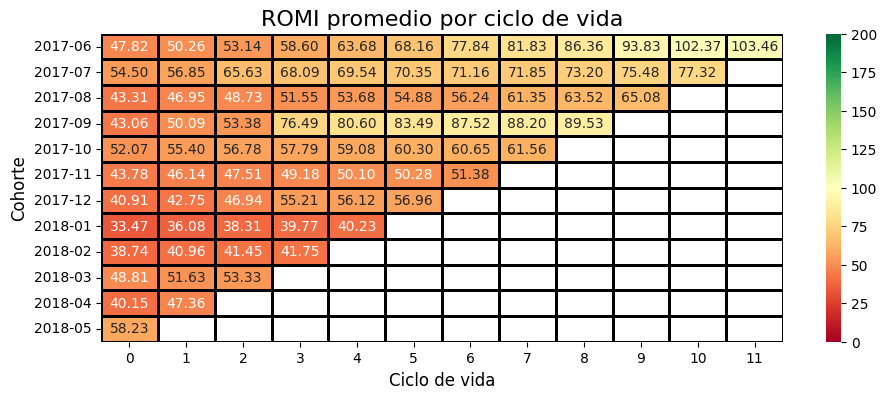

In [53]:
# ROMI promedio por ciclo de vida
romi_lifetime_pivot = romi_lifetime.pivot_table(
    columns='age',
    index='first_buy_month',
    values='romi',
    aggfunc='mean'
).cumsum(axis=1).round(2)

# Gr√°fico de calor:
plt.figure(figsize=(11,4))
sns.heatmap(
    romi_lifetime_pivot,
    vmin=0,
    vmax=200,
    cmap='RdYlGn',
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
# Formateando gr√°fico con plt
plt.title("ROMI promedio por ciclo de vida", fontsize=16)
plt.xlabel("Ciclo de vida", fontsize=12)
plt.ylabel("Cohorte", fontsize=12)
plt.show()

üí° **¬øCu√°n rentables eran las inversiones? (ROMI)**

A partir del mapa de calor general, se puede observar que: 

- En general, el ROMI es bajo. La mayor√≠a de las cohortes no logran recuperar la inversi√≥n realizada, o lo hacen muy lentamente.

- Solo la cohorte de junio de 2017 (2017-06) logr√≥ alcanzar un ROMI mayor al 100%, pero tom√≥ alrededor de 10 meses para hacerlo.

- Aunque casi todas las cohortes inician con un ROMI aceptable, cercano al 50%, el crecimiento posterior es lento o incluso se estanca.

üß† **Conclusi√≥n**:

- Anteriormente ya se hab√≠a identificado que algunas fuentes de adquisici√≥n generan mejores resultados que otras. Ahora, al analizar el ROMI, se refuerza la importancia de evaluar individualmente el desempe√±o por fuente, para identificar en cu√°les conviene seguir invirtiendo y en cu√°les no.

##### 3.1. An√°lisis de ROMI por fuente de adquisici√≥n

In [54]:
# Funci√≥n que genera un mapa de calor ROMI para cada fuente de adquisici√≥n de clientes
def romi_map(fuente):
    romi_source = romi_lifetime.query(f'source_id == {fuente}')

    romi_source_pivot = romi_source.pivot_table(
        columns='age',
        index='first_buy_month',
        values='romi',
        aggfunc='mean'
    ).cumsum(axis=1).round(2)

    # Gr√°fico de calor:
    plt.figure(figsize=(11,4))
    sns.heatmap(
        romi_source_pivot,
        vmin=0,
        vmax=150,
        cmap='RdYlGn',
        annot=True,
        fmt=".2f",
        linewidths=1,
        linecolor='black'
    )
    # Formateando gr√°fico con plt
    plt.title(f"ROMI Fuente {fuente} por ciclo de vida", fontsize=16)
    plt.xlabel("Ciclo de vida", fontsize=12)
    plt.ylabel("Cohorte", fontsize=12)
    plt.show()

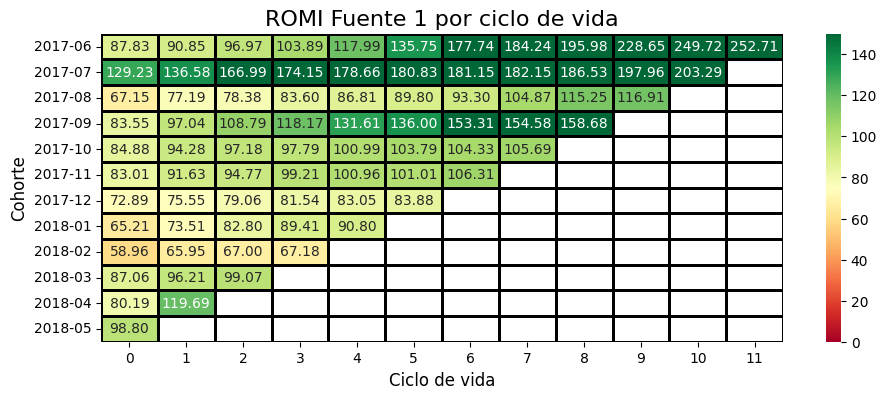

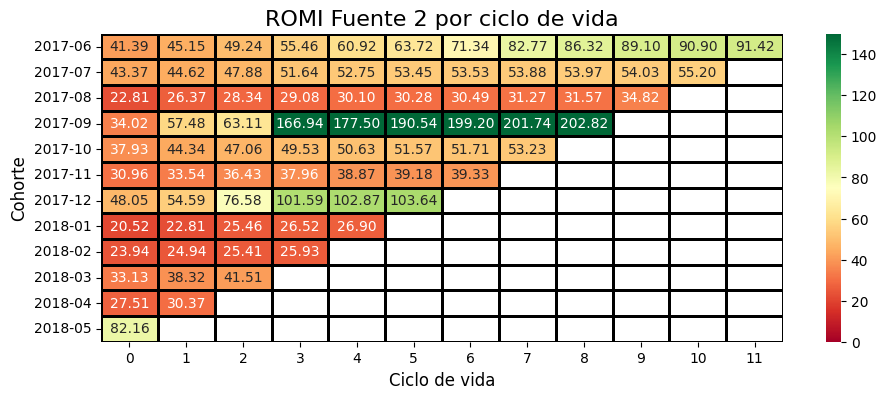

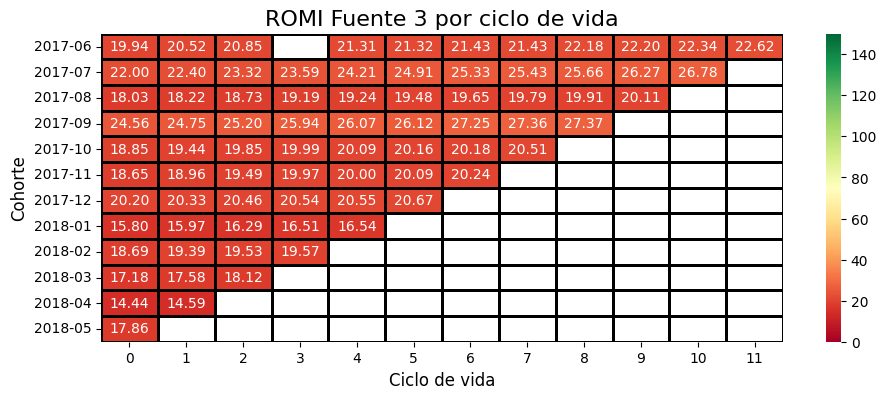

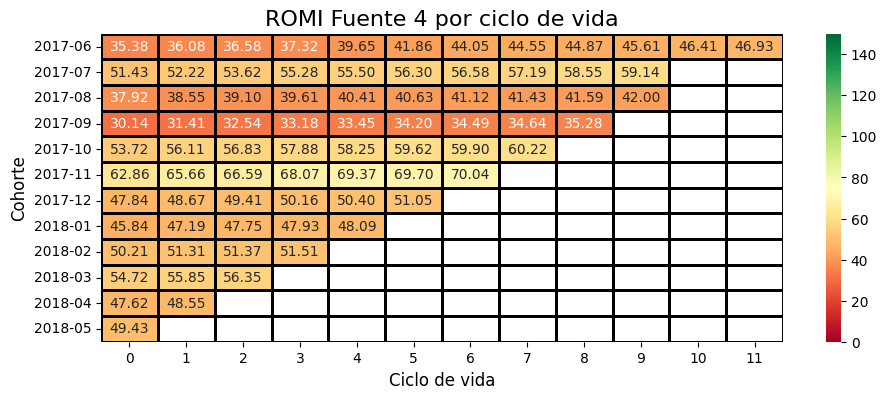

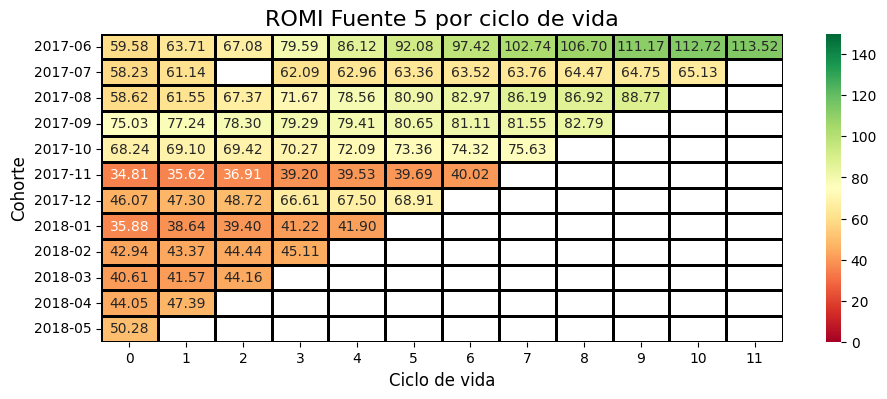

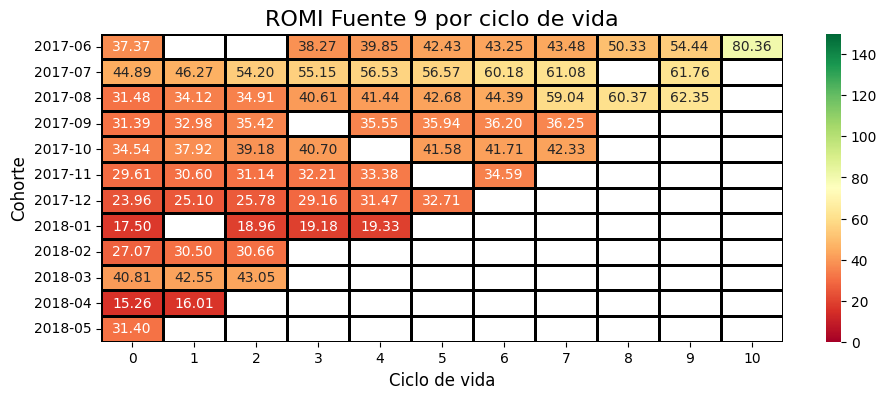

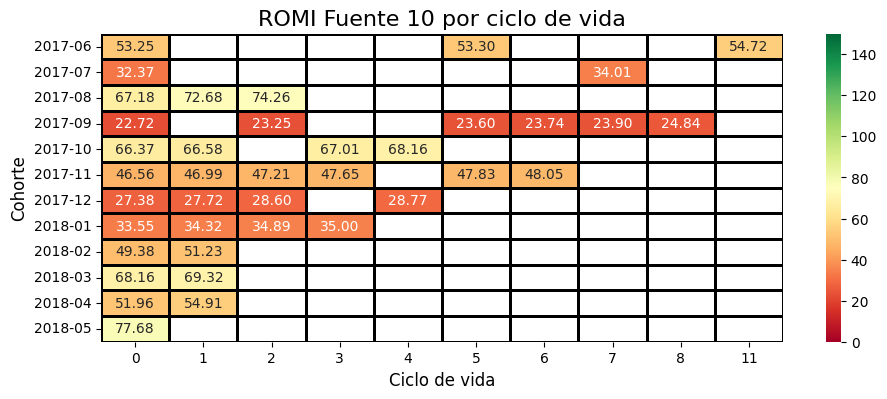

In [55]:
romi_map(1)
romi_map(2)
romi_map(3)
romi_map(4)
romi_map(5)
romi_map(9)
romi_map(10)

üí° **An√°lisis de ROMI por fuente de adquisici√≥n**

Se observa que cada fuente o canal de adquisici√≥n tiene un comportamiento muy diferente: mientras algunas recuperan la inversi√≥n r√°pidamente, otras nunca lo logran y se estancan. A continuaci√≥n, se detallan observaciones espec√≠ficas por fuente:

- **Funte de atracci√≥n #1:** 

Casi todas las cohortes han recuperado la inversi√≥n inicial, siendo la cohorte de diciembre de 2017 (2017-12) la que presenta el peor desempe√±o. Algunas cohortes incluso han alcanzado un ROMI superior al 200%. 

- **Funte de atracci√≥n #2:** 

Aunque la cohorte de septiembre de 2017 (2017-09) muestra un comportamiento sobresaliente ‚Äîrecuperando la inversi√≥n en el tercer mes de vida‚Äî, la mayor√≠a de las dem√°s cohortes nunca alcanzan el punto de recuperaci√≥n, con la √∫nica excepci√≥n de la cohorte de 2017-12. A pesar de esto, si la tendencia sigue igual, muchas cohortes alcanzar√°n a recuperar la inversi√≥n.

- **Funte de atracci√≥n #3:** 

El ROMI es muy bajo; ninguna cohorte se acerca a recuperar la inversi√≥n y el crecimiento es extremadamente lento.

- **Funte de atracci√≥n #4:** 

Aunque no tan negativa como la fuente #3, esta fuente tambi√©n presenta un bajo ROMI. Ninguna cohorte recupera la inversi√≥n y el crecimiento es igualmente lento.

- **Funte de atracci√≥n #5:** 

Esta fuente muestra un patr√≥n interesante: las cohortes m√°s antiguas presentan un mejor ROMI que las cohortes m√°s recientes. A partir de la cohorte de octubre de 2017 (2017-10), se observa un cambio dr√°stico en el comportamiento, volvi√©ndose un canal poco recomendable.

- **Funte de atracci√≥n #9 y #10:** 

Ambas fuentes presentan un bajo ROMI. Adem√°s, en algunos meses de vida de las cohortes no se atrajo a ning√∫n cliente, lo que indica que estos canales no son efectivos en cuanto a adquisici√≥n. El crecimiento del ROMI es lento y limitado.


## **Paso 3. Conclusi√≥n:**
---

 üß†üí° **Conclusi√≥n**:

Las fuentes de adquisici√≥n no son iguales en rentabilidad ni en eficiencia. La fuente 1 destaca claramente, mientras que otras como la 2 y 5 podr√≠an ser recuperables si se ajustan adecuadamente. En paralelo, **la baja retenci√≥n de usuarios y ca√≠da del LTV tras el primer mes limita el retorno de cualquier canal**. Por tanto, adem√°s de optimizar la inversi√≥n por canal, se recomienda:

- Dise√±ar estrategias de retenci√≥n y fidelizaci√≥n, para alargar el ciclo de vida del cliente.

- Mejorar el seguimiento de visitas y campa√±as, ya que una parte importante de los usuarios activos no est√° vinculada a ning√∫n canal conocido.

**De acuerdo al comportamiento observado en los diferentes an√°lisis, se recomienda:**

- Invertir en la fuente de adquisici√≥n 1, es la que ha dado un mejor ROMI a lo largo de toda su implementaci√≥n.

- En cuanto a la fuente 2, revisar que provoc√≥ que la cohorte 2017-09 tenga un comportamiento tan positivo. La fuente en general no es perfecta pero puede considerarse aplicar mejoras y seguir invirtiendo en ella.

- Revisar la fuente 5 para descubrir cual es la raz√≥n del cambio en el ROMI. Al inicio tuvo resultados muy buenos pero las cohortes mas jovenes no.

- Suspender momentaneamente las fuentes 4, 9 y 10. Sus comportamientos son de regulares a malos.

- Cesar inmediatamente la inversi√≥n en la fuente 3. El romi es extremadamente malo.